In [12]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)
print 'Enter speed'
c = int(raw_input()) #скорость переноса
h = (b - a) / n
# tau = h / c *(X), такое что c*tau/h < 1

Enter number of segments
100
Enter ends of segment
-1 1
Enter speed
1


In [14]:
print 'Enter X for tau'
X = float(raw_input())
tau = h * X / c
if c * tau / h > 1:
    print 'wrong input'
print 'kurant = ', c * tau / h, ', tau = ', tau, ', h = ', h

Enter X for tau
1
kurant =  1.0 , tau =  0.02 , h =  0.02


num of steps = 60 
T = 1.2



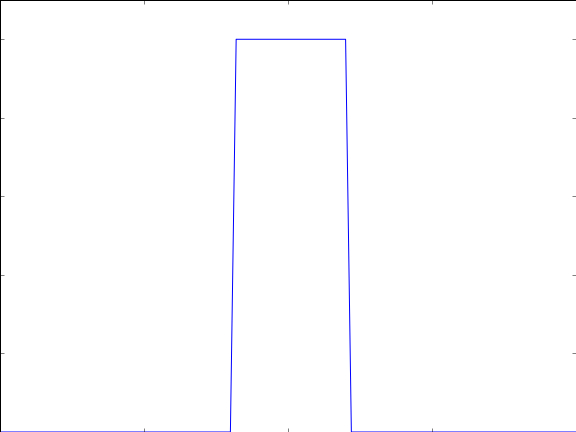
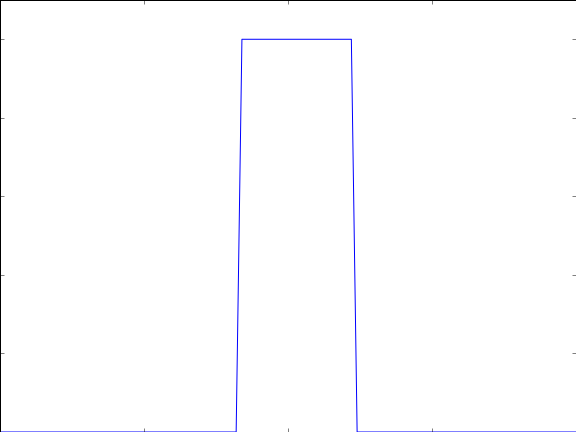
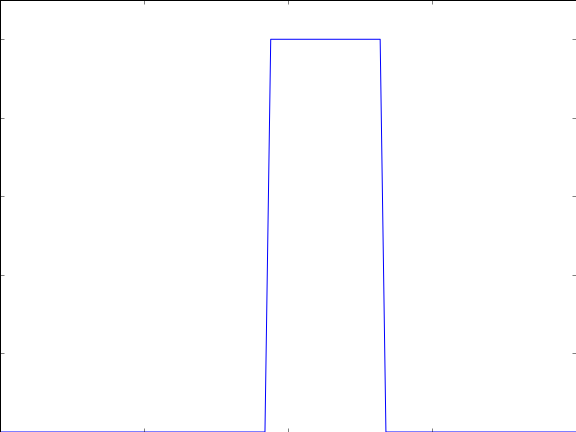
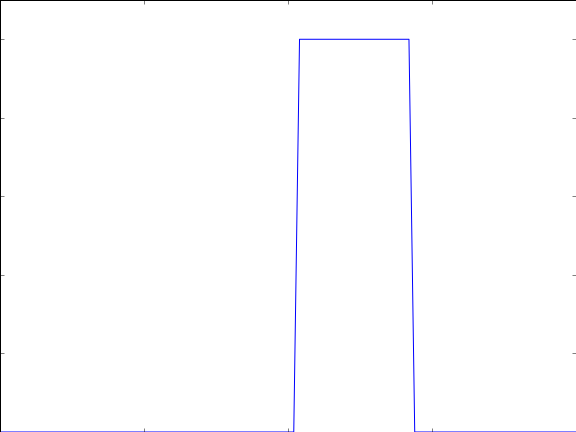
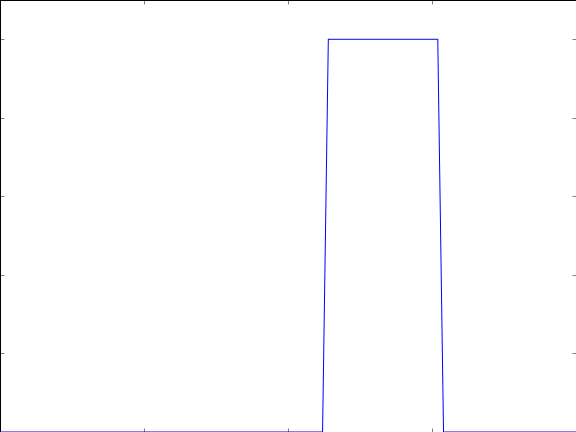
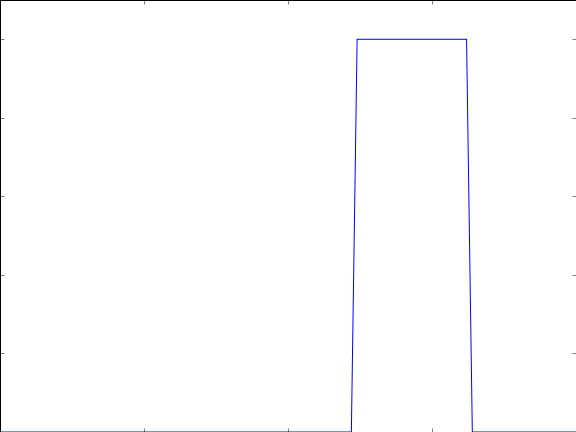
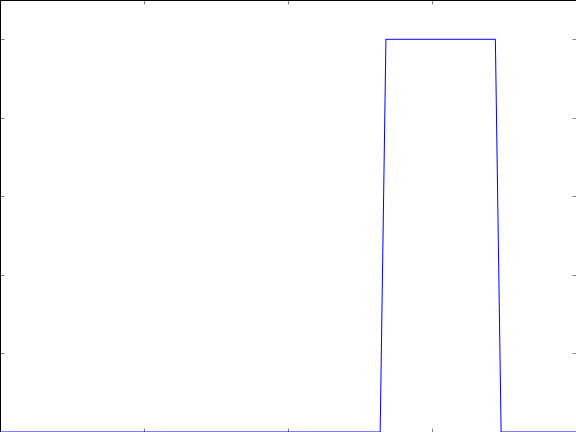
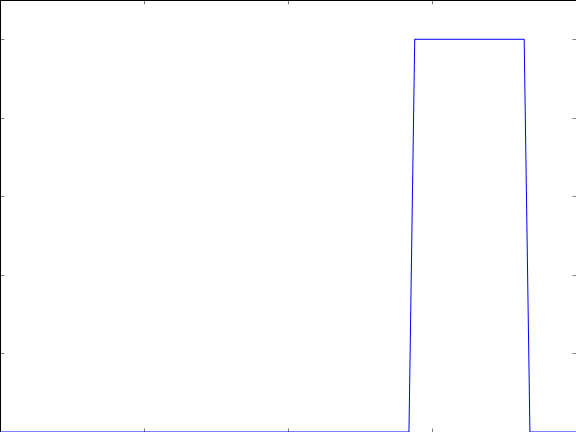
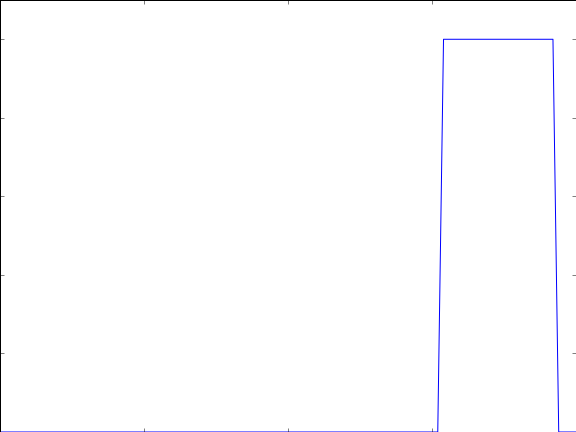
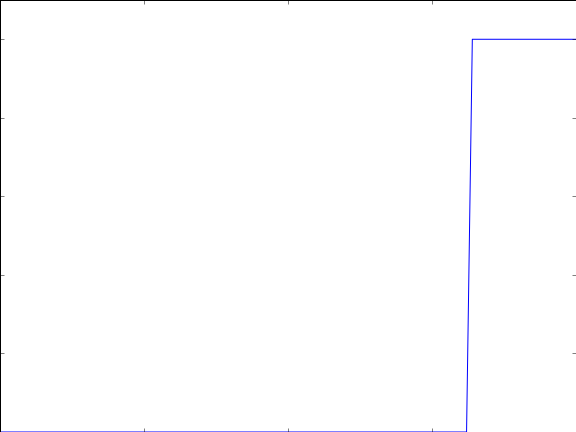
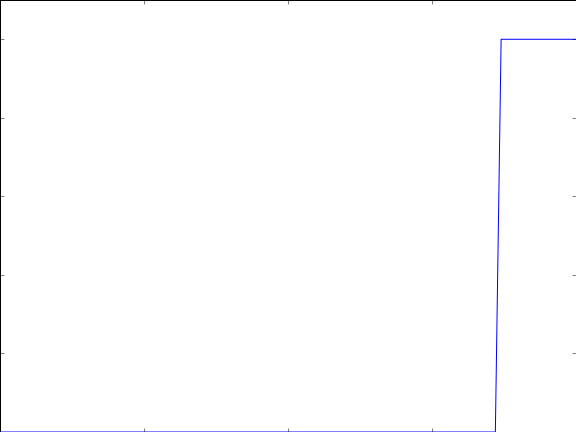
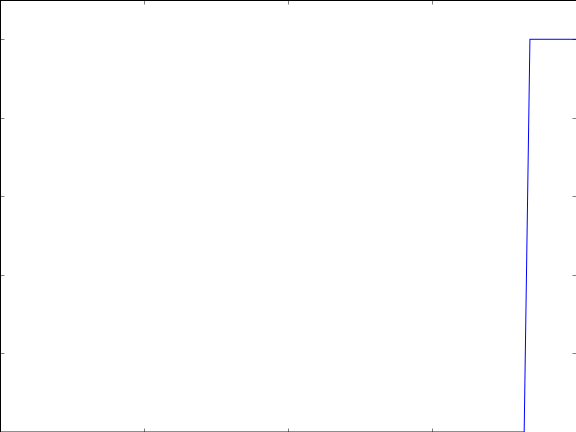
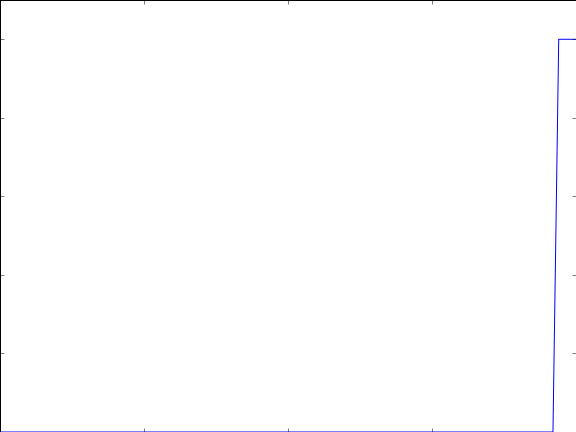

In [15]:
x = np.linspace(a, b, n+1) #сетка
result = []
u = np.zeros(n+1) # решение
for i in range(int(1 + 0.4*n), int(1 + 0.6*n)):
    u[i] = 1
t = 0
num = 0
result.append(list(u))
while np.any(u):
    tmp = np.zeros(n+1)
    for i in range(1, n+1):
        tmp[i] = ( (u[i] - u[i-1]) * (x[i] - c * tau) + u[i-1] * x[i] - u[i] * x[i-1] ) / h
        if tmp[i] < 10e-10:
            tmp[i] = 0
    u = tmp[:]
    if num % 5 == 0:
        result.append(list(u))
    t += tau
    num += 1
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[i])
    axis.axis([a, b, 0, 1.1])
#     return dg.plot(axis, nontvd[i])

def init():
    axis.plot(x, result[0])
    axis.axis([a, b, 0, 1.1])
#     return dg.plot(axis, nontvd[0])

print 'num of steps =', num, '\nT =', t

animation.FuncAnimation(fig, animate, frames=len(result), 
                        init_func=init,interval=300, blit=False)